In [2]:
#Crear las carpetas para subir las imagenes
!mkdir mesofilia
!mkdir termofilia
!mkdir maduracion

Ya existe el subdirectorio o el archivo mesofilia.
Ya existe el subdirectorio o el archivo termofilia.
Ya existe el subdirectorio o el archivo maduracion.


In [3]:
!pip install unzip

In [7]:
#Entrar en cada carpeta y descomprimir el archivo zip
%cd mesofilia
!unzip mesofilia.zip
%cd ..

%cd maduracion
!unzip maduracion.zip
%cd ..

%cd termofilia
!unzip termofilia.zip
%cd ..

E:\IA\compost\mesofilia
Archive:  mesofilia.zip
  inflating: 1-5-300x225 - copia (2).jpg  
  inflating: 1-5-300x225 - copia (3) - copia - copia - copia.jpg  
  inflating: 1-5-300x225 - copia (3) - copia - copia.jpg  
  inflating: 1-5-300x225 - copia (3) - copia.jpg  
  inflating: 1-5-300x225 - copia (3).jpg  
  inflating: 1-5-300x225 - copia - copia (2).jpg  
  inflating: 1-5-300x225 - copia - copia - copia (2).jpg  
  inflating: 1-5-300x225 - copia - copia - copia - copia (2).jpg  
  inflating: 1-5-300x225 - copia - copia - copia - copia - copia (2).jpg  
  inflating: 1-5-300x225 - copia - copia - copia - copia - copia - copia (2).jpg  
  inflating: 1-5-300x225 - copia - copia - copia - copia - copia - copia - copia (2).jpg  
  inflating: 1-5-300x225 - copia - copia - copia - copia - copia - copia - copia - copia.jpg  
  inflating: 1-5-300x225 - copia - copia - copia - copia - copia - copia - copia.jpg  
  inflating: 1-5-300x225 - copia - copia - copia - copia - copia - copia.jpg  
  

In [ ]:
#Borrar los archivo ZIP
!rm -rf /content/termofilia/termofilia.zip
!rm -rf /content/mesofilia/mesofilia.zip
!rm -rf /content/maduracion/maduracion.zip

In [8]:
#Mostrar cuantas imagenes tengo de cada categoria
!ls /content/termofilia | wc -l #475
!ls /content/mesofilia | wc -l #515
!ls /content/maduracion | wc -l #419

ls: cannot access '/content/termofilia': No such file or directory
wc: '#475': No such file or directory
ls: cannot access '/content/mesofilia': No such file or directory
wc: '#515': No such file or directory
ls: cannot access '/content/maduracion': No such file or directory
wc: '#419': No such file or directory


In [10]:
#Mostrar algunas imagenes con pyplot
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/mesofilia'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

SyntaxError: invalid syntax (3857907704.py, line 9)

In [ ]:
#Crear carpetas para hacer el set de datos

!mkdir dataset
!mkdir dataset/cuchillo
!mkdir dataset/tenedor
!mkdir dataset/cuchara

In [ ]:
#Copiar imagenes que subimos a carpetas del dataset
#Limitar para que todos tengan la misma cantidad de imagenes
#maximo 419 (el num. menor de imagenes que subi)

import shutil
carpeta_fuente = '/content/mesofilia'
carpeta_destino = '/content/dataset/mesofilia'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 419:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
carpeta_fuente = '/content/maduracion'
carpeta_destino = '/content/dataset/maduracion'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 419:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
carpeta_fuente = '/content/termofilia'
carpeta_destino = '/content/dataset/termofilia'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 419:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
#Mostrar cuantas imagenes tengo de cada categoria en el dataset
!ls /content/dataset/cuchara | wc -l
!ls /content/dataset/cuchillo | wc -l
!ls /content/dataset/tenedor | wc -l

419
419
419


In [11]:
#Aumento de datos con ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

In [ ]:
#Congelar el modelo descargado
mobilenetv2.trainable = False

In [ ]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
#Compilar como siempre
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Entrenar el modelo
EPOCAS = 50

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/50
32/32 [==============================] - 36s 743ms/step - loss: 0.7850 - accuracy: 0.6590 - val_loss: 0.4392 - val_accuracy: 0.8394
Epoch 2/50
32/32 [==============================] - 21s 661ms/step - loss: 0.4611 - accuracy: 0.8260 - val_loss: 0.3211 - val_accuracy: 0.9116
Epoch 3/50
32/32 [==============================] - 21s 674ms/step - loss: 0.3929 - accuracy: 0.8489 - val_loss: 0.3075 - val_accuracy: 0.9036
Epoch 4/50
32/32 [==============================] - 22s 678ms/step - loss: 0.3850 - accuracy: 0.8489 - val_loss: 0.2706 - val_accuracy: 0.9116
Epoch 5/50
32/32 [==============================] - 22s 678ms/step - loss: 0.3547 - accuracy: 0.8519 - val_loss: 0.2473 - val_accuracy: 0.8916
Epoch 6/50
32/32 [==============================] - 22s 681ms/step - loss: 0.3418 - accuracy: 0.8638 - val_loss: 0.2221 - val_accuracy: 0.9237
Epoch 7/50
32/32 [==============================] - 22s 679ms/step - loss: 0.3094 - accuracy: 0.8877 - val_loss: 0.2191 - val_accuracy: 0.9116

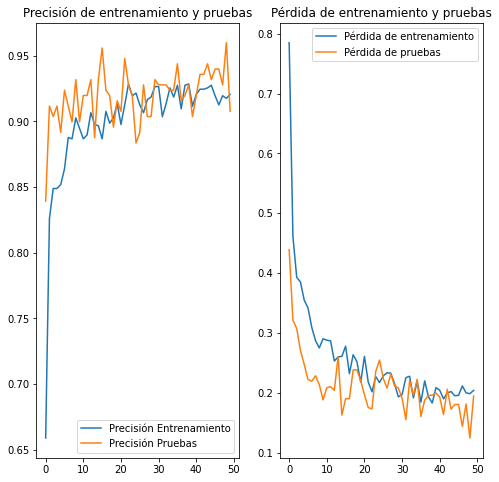

In [ ]:
#Graficas de precisión
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [ ]:
#Categorizar una imagen de internet
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)


In [ ]:

url = 'tu imagen para probar la red' #debe ser 2
prediccion = categorizar (url)
print(prediccion)

2


In [ ]:
#Crear la carpeta para exportarla a TF Serving
!mkdir -p carpeta_salida/modelo_compost/1

In [2]:
#Guardar el modelo en formato SavedModel
modelo.save('carpeta_salida/modelo_compost/1')

NameError: name 'modelo' is not defined

In [1]:
#Hacerlo un zip para bajarlo y usarlo en otro lado
!zip -r modelo_cocina.zip /content/carpeta_salida/modelo_cocina/

	zip warning: name not matched: /content/carpeta_salida/modelo_cocina/

zip error: Nothing to do! (try: zip -r modelo_cocina.zip . -i /content/carpeta_salida/modelo_cocina/)
